# Download raw data from **github**.

In [1]:
!git clone https://github.com/bioscar000/TFM.git

fatal: destination path 'TFM' already exists and is not an empty directory.


# Python Libraries
In this section, the necessary imports for the project are made.



In [2]:
# Install non Colaboratory by default
!pip install pyFAI

# Import the fundamental libraries for our project
import TFM.utils #Already in the TFM folder from github
import os
import shutil

# Specify and explore the data folder.
In this section, we will specify the folder path where Fiber Diffraction images are located. These images will be used as examples in the TFM ("Trabajo de Fin de Máster").

In [3]:
# Specify the folder woth Fiber Diffraction image files
data_folder = './TFM/raw_data'
# Check if the folder exists
if os.path.exists(data_folder):
    # Get the list of files in the folder
    subfolders = os.listdir(data_folder)
    print(subfolders)
else:
    print("Unable to find the raw_data folder")

['sample', 'calibrant', 'buffer']


# Results Folder Setup
The code block below is responsible for setting up the results folder for storing processed data.

In [4]:
# Create or recreate the results folder
results_folder = './TFM/results'
if os.path.exists(results_folder):
    print(f"Warning: The '{results_folder}' folder already exists. Deleting existing folder...")
    shutil.rmtree(results_folder)

print(f"Creating the '{results_folder}' folder.")
os.makedirs(results_folder)

Creating the './TFM/results' folder.


# Process raw files
This section defines the filename (AVG_sample.tif). Additionally, it obtains lists of files in the 'buffer' and 'sample' folders for further processing.

In [5]:
# Define files names
avg_sample = './TFM/results/AVG_sample.tif'

# Define basename folders
buffer_folder = './TFM/raw_data/buffer/'
sample_folder = './TFM/raw_data/sample/'

# Create stacks
buffer_files = [buffer_folder + file for file in os.listdir(buffer_folder)]
sample_files = [sample_folder + file for file in os.listdir(sample_folder)]

# Process raw data and obtain TIF images
TFM.utils.processStack(sample_files, method='mean', dark=buffer_files, name=avg_sample)

/usr/local/lib/python3.10/dist-packages/pyFAI/average.py:448: RuntimeWarning: invalid value encountered in divide
  mask = ((abs(stack - center) / std) > cutoff)


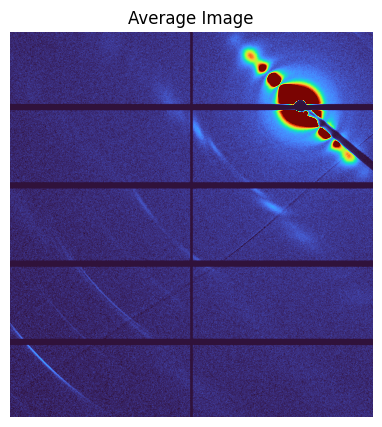

In [6]:
import tifffile
import matplotlib.pyplot as plt

# Read image
avg_img = tifffile.imread(avg_sample)

# Show images
plt.figure(figsize=(10, 5))

# Plot average image
plt.imshow(avg_img, cmap='turbo', vmin=0, vmax=200)
plt.title('Average Image')
plt.axis('off')
plt.show()

# Set up the geometry

This integrator will be used for azimuthal integration in subsequent steps.

In [7]:
import pyFAI

# Load the pyFAI azimuthal integrator using the calibration file (poni file).
ai = pyFAI.load('./TFM/raw_data/calibrant/pilatus_AgBh_000_0000.poni')

# 2D integration

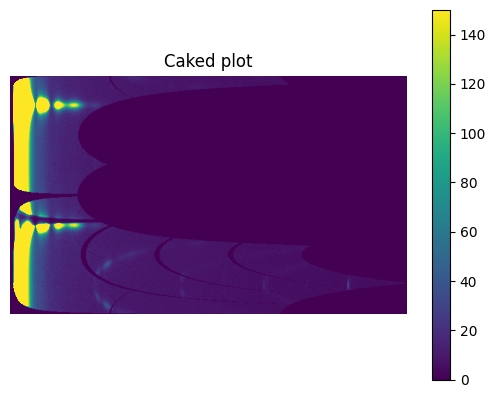

In [8]:
import fabio

# 2d integration and caked plot
caked_plot= "./TFM/results/caked_plot.edf"
TFM.utils.two_d_integration(avg_img, caked_plot, ai)

# Show caked plot
two_d_img = fabio.open(caked_plot).data
plt.imshow(two_d_img, cmap='viridis', vmin=0, vmax=150)
plt.title('Caked plot')
plt.colorbar()
plt.axis('off')
plt.show()

# 1D integration

Perform one-dimensional integration for average image (res_AVG_EQ and res_AVG_ME) and standard deviation image (res_STD_EQ)

Save results to files: "./TFM/results/EQ_AVG.dat", "./TFM/results/ME_AVG.dat", "./TFM/results/EQ_STD.dat"

In [9]:
#Integration ranges: (220, 230) for EQ, (130, 140) for ME
res_AVG_EQ = TFM.utils.one_d_integration(avg_img, (220,230), "./TFM/results/EQ_AVG.dat", ai)
res_AVG_ME = TFM.utils.one_d_integration(avg_img, (130,140), "./TFM/results/ME_AVG.dat", ai)

# Meridian structural analysis

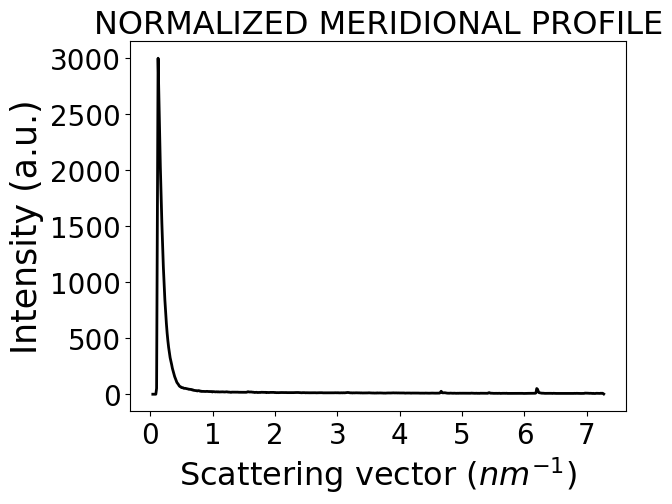

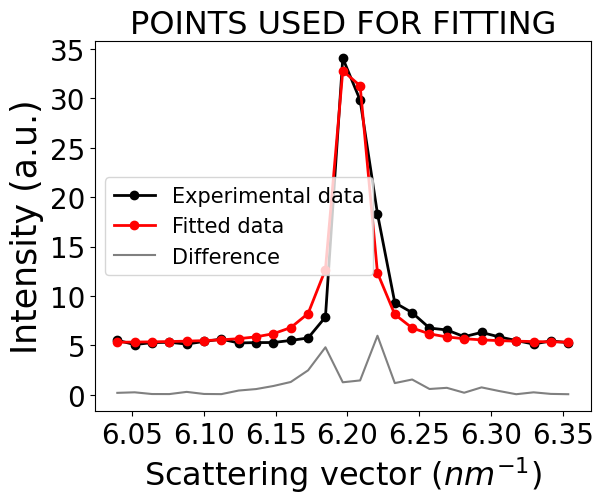

x0: 6.2026
Error x0: 0.0004
Rsuared: 0.9442
Avg Mon Len: 4.0520

In [10]:
TFM.utils.me_struct_params_analysis(res_AVG_ME)

# Equatorial structural analysis

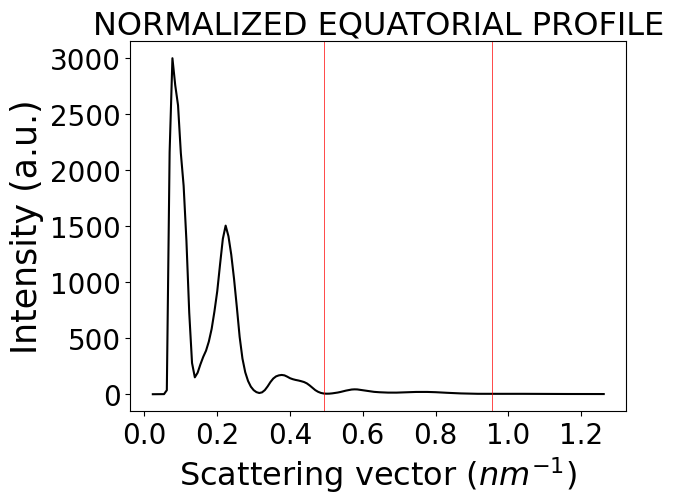

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


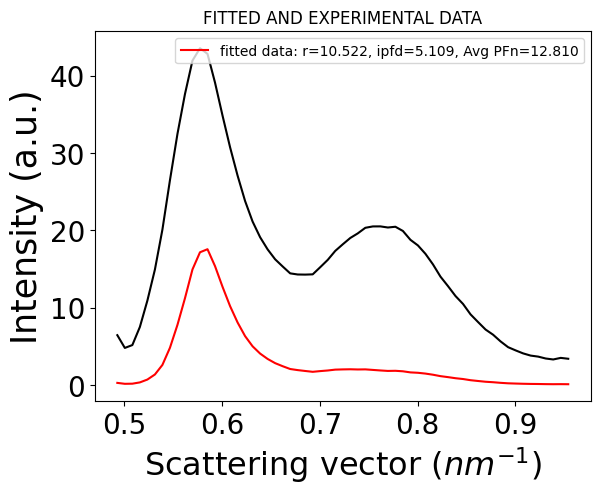

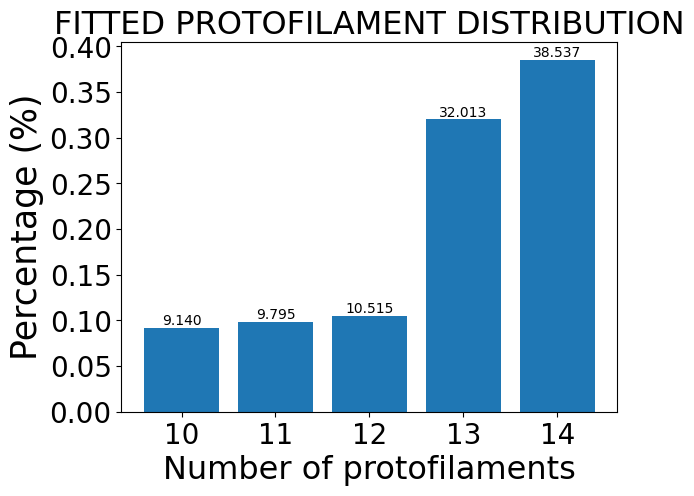

In [11]:
p_d = [9, 10, 11, 12, 13] # Protofilament distribution
TFM.utils.eq_struct_params_analysis(res_AVG_EQ, p_d)